Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols=["flength","fwidth","fsize","fconc","fconc1","fAsym","fM3long","fM3trans","fMalpha","fDist","class"]
data=pd.read_csv(r"C:\Users\OWNER\Downloads\magic04.data",names=cols)

In [4]:
data

,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3long,fM3trans,fMalpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
data["class"]=(data["class"]=="g").astype(int)

In [6]:
data


,flength,fwidth,fsize,fconc,fconc1,fAsym,fM3long,fM3trans,fMalpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [7]:
data["class"].unique()

array([1, 0])

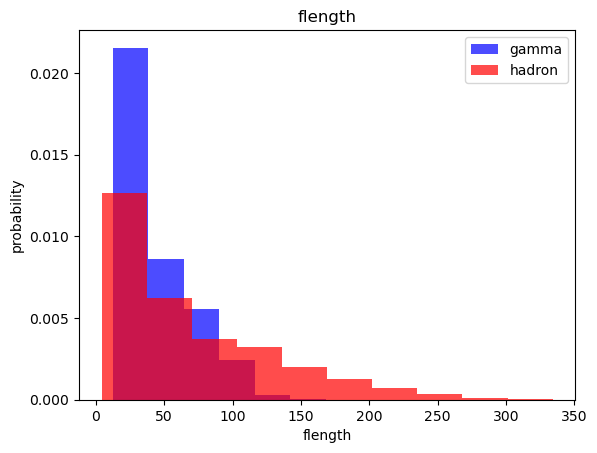

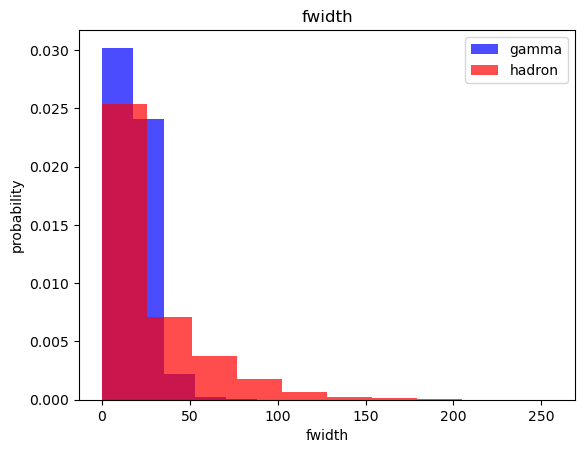

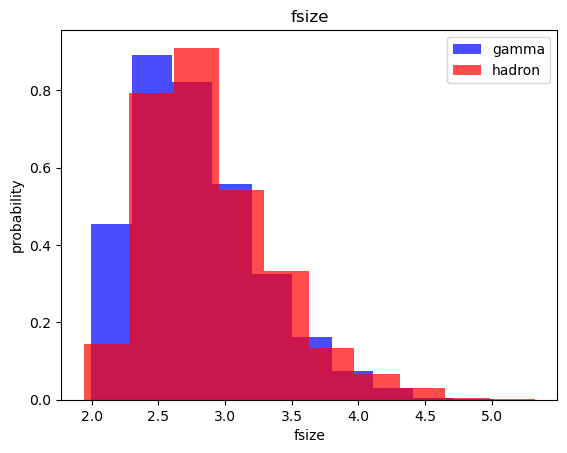

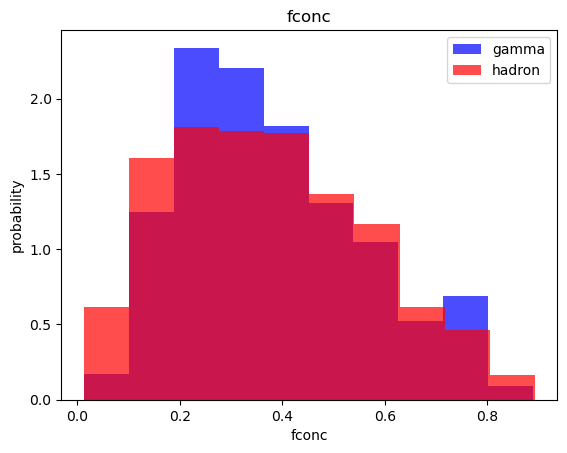

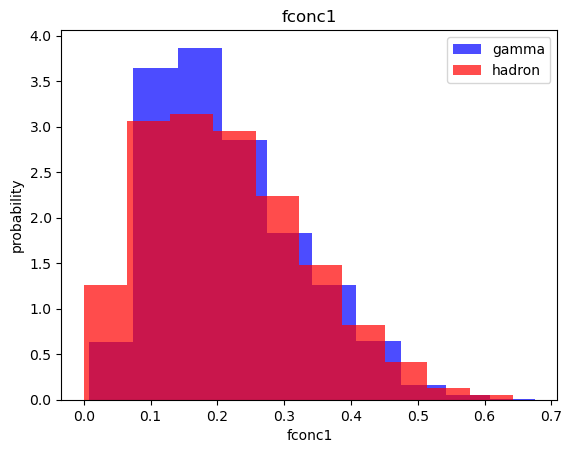

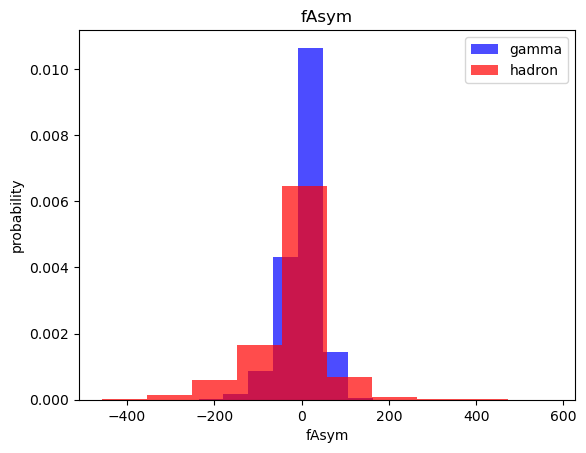

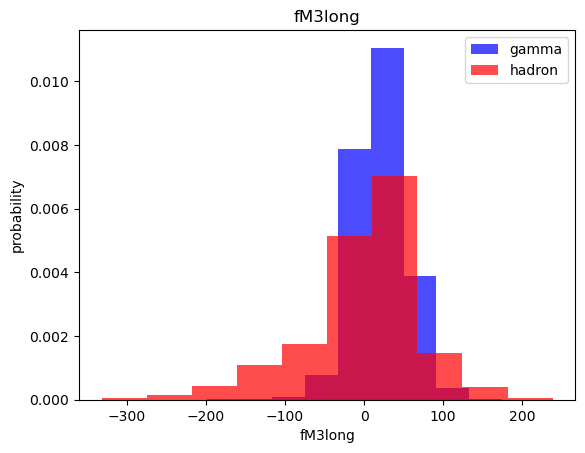

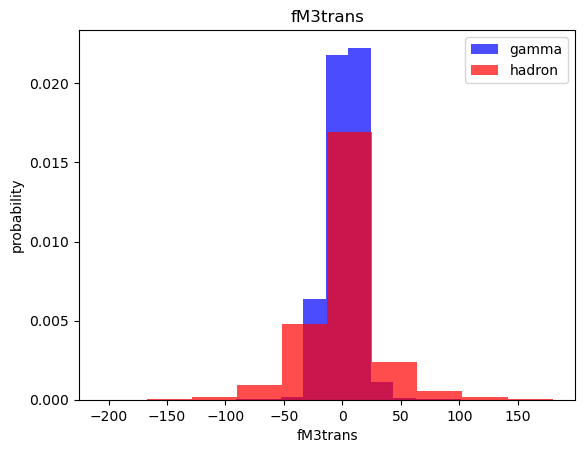

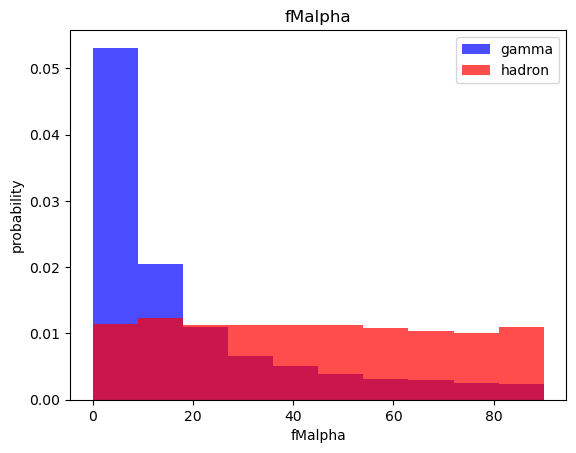

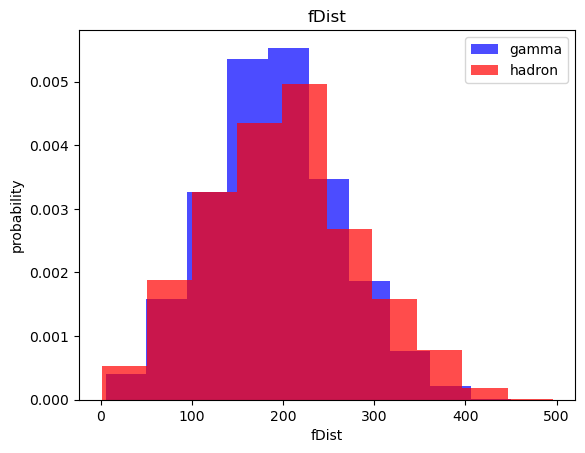

In [8]:
for label in cols[:-1]:
    plt.hist(data[data["class"]==1][label], color="blue",label="gamma",alpha=0.7, density=True)
    plt.hist(data[data["class"]==0][label], color="red",label="hadron",alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train,Validaton and Test Dataset

In [9]:
Train,valid,test=np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])

In [17]:
def scale_datset(dataframe,oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    
    scaler=StandardScaler()
    if oversample:#balacing the datasets
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
    X=scaler.fit_transform(x)
    data=np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y

In [18]:
print(len(Train[Train["class"]==1]))  #gamma
print(len(Train[Train["class"]==0]))  #hadron

7432
3980


In [19]:
Train,x_Train,y_Train=scale_datset(Train,oversample=True)